In [1]:
# ML analysis 

### STEPS TO BE ACCOMPLISHED
#### 1. IMPORTS
#### 2. Data :: Download, Load, Explore, Preprocessing
#### 3. Exploratory Data Visualization
#### 4. Model Building And Training :: Build Logistic Regression Model, Training the Model
#### 5. Evaluation :: Evaluating Training Set, Evaluating Testing Set
#### 6. Generating Classification Report
#### 7. Visualizing using Confusion Matrix
#### 8. Conclusion

In [5]:
# 1. IMPORTS Done
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc

In [6]:
# 2. Data :: Loading, reading, exploring

heartML = pd.read_csv("heartML.csv")
print(heartML.shape)
heartML.info()
heartML.head(5)

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart = pd.read_csv("heart_updated.csv")
print(heart.shape)
heart.info()
heart.head(5)

(10976, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LocationAbbr        10976 non-null  object 
 1   Deaths per 100,000  10976 non-null  float64
 2   Gender              10976 non-null  object 
 3   Race/Ethnicity      10976 non-null  object 
dtypes: float64(1), object(3)
memory usage: 343.1+ KB


,LocationAbbr,"Deaths per 100,000",Gender,Race/Ethnicity
0,AK,254.3,Overall,White
1,AK,261.5,Overall,White
2,AK,285.4,Overall,White
3,AK,278.9,Overall,White
4,AK,284.2,Overall,White


In [8]:
heartML.drop_duplicates(inplace=True)
heart.drop_duplicates(inplace=True)
print(sum(heartML.duplicated()))
print(sum(heart.duplicated()))

0
0


In [9]:
heartML.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
heart.isnull().sum()

LocationAbbr          0
Deaths per 100,000    0
Gender                0
Race/Ethnicity        0
dtype: int64

1    164
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

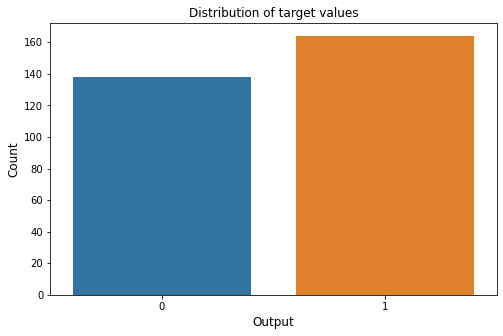

In [11]:
print(heartML['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)